# Fashion MNIST Dataset

In [1]:
# Install library
%pip install torch torchvision

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 38.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 46.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.4 MB/s eta 0:00:0000:01
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.2 MB/s eta 0:00:0000:01
Using cached setuptools-7

In [2]:
# Import libraries

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from sklearn.decomposition import PCA

## Data Exploration and Processing

In [3]:
#  Define transform to normalize data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
# Download training data

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

trainset

100.0%


Extracting /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw



100.0%

Extracting /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw




100.0%
100.0%


Extracting /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw

Extracting /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/abhishekdas/.pytorch/F_MNIST_data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /Users/abhishekdas/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [5]:
# Load trainset

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

trainloader

In [6]:
# Download test data

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /Users/abhishekdas/.pytorch/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [7]:
# Load testset

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

testloader

In [8]:
# Check shape of images and labels

images, labels = next(iter(trainloader))

print("Images shape:",images.shape)
print("Labels shape:",labels.shape)

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


Image shape: torch.Size([1, 28, 28])
Label: 9


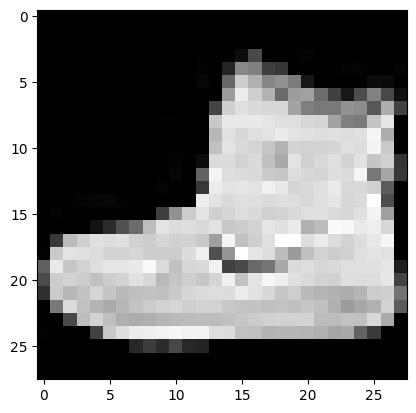

In [9]:
# Vizualize batch of training data - A

image,label = trainset[0]

print("Image shape:",image.shape)
print("Label:",label)

plt.imshow(image.reshape(28,28),cmap="gray")

In [10]:
# Get classes - A

classes = trainset.classes

print(classes)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
# Print target values - A

target_values = trainset.targets

print(target_values.unique())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


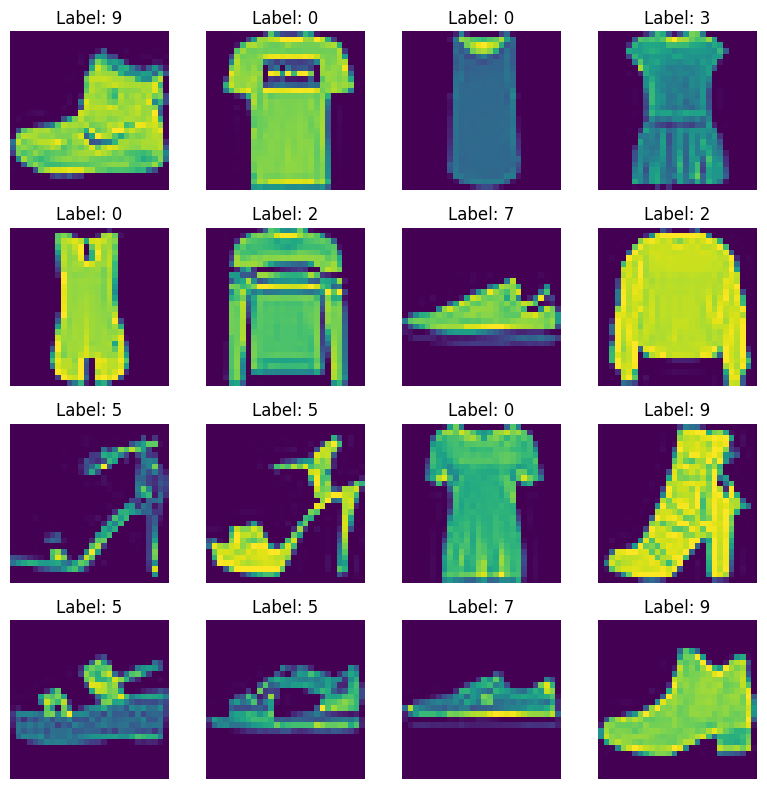

In [13]:
# Vizualize images - A

figure, axs = plt.subplots(4, 4, figsize=(8, 8))

# Loop through each subplot
for x in range(4):
    for j in range(4):
        image, label = trainset[x * 4 + j]  # Get image and label
        image_numpy = image.numpy().squeeze()
        axs[x, j].imshow(image_numpy)  # Plot the image
        axs[x, j].axis('off')
        axs[x, j].set_title(f"Label: {label}")

plt.tight_layout()
plt.show()